# Fourier transform

We make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [1]:
import numpy as np
from numpy.fft import fft2,fftshift
import matplotlib.pyplot as plt
from PIL import Image

son = np.array(Image.open('img/son.png'))
sonrot = np.array(Image.open('img/sonrot.png'))

## Properties of Fourier Transform Applied on Natural Images

In [2]:
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return np.abs(fftshift(If))

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return np.log(1+np.abs(fftshift(If)))

def thresholdImage(I,s):
    image = I.copy()
    for i in np.arange(image.shape[0]):
        for j in np.arange(image.shape[1]):
            if(image[i][j] < s):
                image[i][j] = 0
            else:
                image[i][j] = 255
    return image

def blend(I1,I2,alpha):
    """ Array**2*float -> Array """
    if(alpha <0 or alpha>1):
        raise Exception("Alpha value must be between 0 and 1")
    return alpha*I1+(1-alpha)*I2

def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    size = 32
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))


def rectifyOrientation(I):
    ft = computeFT(I)
    module = toVisualizeFT(ft)
    tholdModule = thresholdImage(module,3*np.power(10,5))
    mo = mainOrientation(tholdModule)
    rectifiedImage = rotateImage(I,-mo[1])
    return rectifiedImage



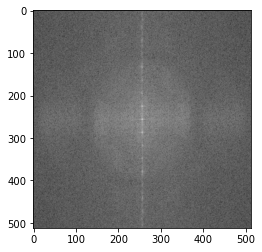

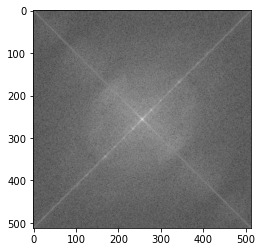

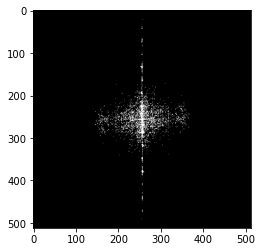

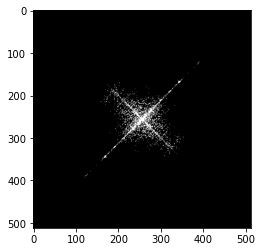

In [11]:
ftson = computeFT(son)
ftsonrot = computeFT(sonrot)

moduleLogSon = toVisualizeLogFT(ftson)
moduleLogSonrot = toVisualizeLogFT(ftsonrot)
plt.imshow(moduleLogSon, cmap = 'gray')
plt.show()
plt.imshow(moduleLogSonrot, cmap = 'gray')
plt.show()

moduleSon = toVisualizeFT(ftson)
moduleSonrot = toVisualizeFT(ftsonrot)
tholdModuleSon = thresholdImage(moduleSon, np.power(10,5))
tholdModuleSonrot = thresholdImage(moduleSonrot, np.power(10,5))
plt.imshow(tholdModuleSon, cmap = 'gray')
plt.show()
plt.imshow(tholdModuleSonrot, cmap = 'gray')
plt.show()

We can clearly see the convolution property of the fourier transform. Simply we have eliminated some amplitude values which are below the threshold value. And that helped us to see which direction the image has been rotated. Without the thresholding process, it is very hard to distinguish the direction in the second image.


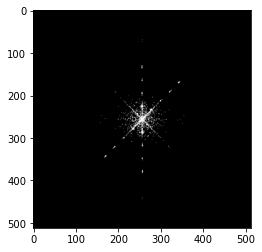

In [6]:
blendedImage = blend(son,sonrot,0.5)
ftBlendedImg = computeFT(blendedImage)
module = toVisualizeFT(ftBlendedImg)
thresholdModule = thresholdImage(module,np.power(10,5))
plt.imshow(thresholdModule, cmap='gray')
plt.show()

Now we see the linearity property of the fourier transform. Both images have their own spectrums. If we look at the spectrums seperately we will see that the blended spectrum is actually some kind of avarage of these spectrums. And lastly, the role of the alpha value is determine the contribution of the images to the result spectrum.

## Experimenting The Rotation of Images  

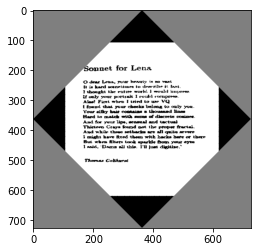

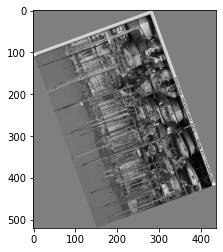

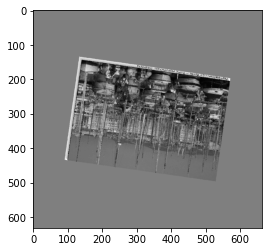

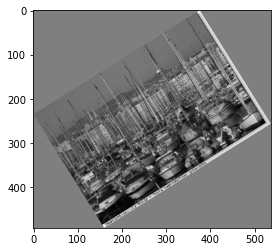

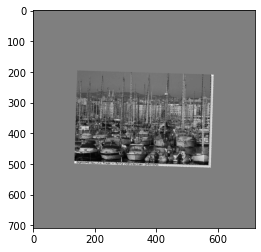

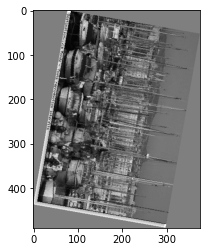

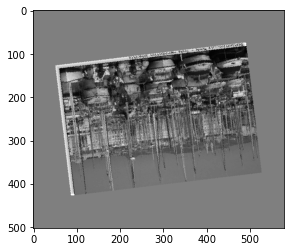

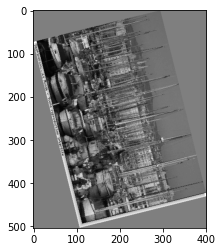

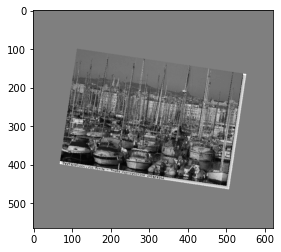

In [8]:
ri = rectifyOrientation(sonrot)
plt.imshow(ri,cmap='gray')
plt.show()

portImage = np.array(Image.open('img/port.jpg'))
rotatedImage = rotateImage(portImage,110)
plt.imshow(rotatedImage,cmap='gray')
plt.show()
ri = rectifyOrientation(rotatedImage)
plt.imshow(ri,cmap='gray')
plt.show()

rotatedImage = rotateImage(portImage,32)
plt.imshow(rotatedImage,cmap='gray')
plt.show()
ri = rectifyOrientation(rotatedImage)
plt.imshow(ri,cmap='gray')
plt.show()

rotatedImage = rotateImage(portImage,260)
plt.imshow(rotatedImage,cmap='gray')
plt.show()
ri = rectifyOrientation(rotatedImage)
plt.imshow(ri,cmap='gray')
plt.show()

rotatedImage = rotateImage(portImage,-76)
plt.imshow(rotatedImage,cmap='gray')
plt.show()
ri = rectifyOrientation(rotatedImage)
plt.imshow(ri,cmap='gray')
plt.show()